# 01_04_copy_bdfl_files_ys

## 필요한 모듈

이 프로젝트를 위해서는 아래의 모듈이 필요하다. 

> numpy, pandas, matplotlib, astropy, version_information

### 모듈 설치

1. 콘솔 창에서 모듈을 설치할 때는 아래와 같은 형식으로 입력하면 된다.

>pip install module_name==version

>conda install module_name==version

2. 주피터 노트북(코랩 포함)에 설치 할 때는 아래의 셀을 실행해서 실행되지 않은 모듈을 설치할 수 있다. (pip 기준) 만약 아나콘다 환경을 사용한다면 7행을 콘다 설치 명령어에 맞게 수정하면 된다.

In [1]:
import importlib, sys, subprocess
packages = "numpy, pandas, matplotlib, scipy, astropy, photutils, ccdproc, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        print(f"**** module {pkg} is not installed")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
    else: 
        print(f"**** module {pkg} is installed")

**** module numpy is installed
**** module pandas is installed
**** module matplotlib is installed
**** module scipy is installed
**** module astropy is installed
**** module photutils is installed
**** module ccdproc is installed
**** module version_information is installed


### 모듈 버전 확인

아래 셀을 실행하면 이 노트북을 실행한 파이썬 및 관련 모듈의 버전을 확인할 수 있다.

In [2]:
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

This notebook was generated at 2023-02-02 17:41:31 (KST = GMT+0900) 
0 Python     3.8.16 64bit [GCC 11.2.0]
1 IPython    8.8.0
2 OS         Linux 5.15.0 58 generic x86_64 with glibc2.17
3 numpy      1.22.3
4 pandas     1.5.2
5 matplotlib 3.6.3
6 scipy      1.8.1
7 astropy    5.2.1
8 photutils  1.6.0
9 ccdproc    2.4.0
10 version_information 1.0.4


### import modules

In [3]:
from glob import glob
from pathlib import Path
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.stats import sigma_clip
from ccdproc import combine, ccd_process, CCDData

import ysfitsutilpy as yfu
import ysphotutilpy as ypu
import ysvisutilpy as yvu

import _astro_utilities
import _Python_utilities

plt.rcParams.update({'figure.max_open_warning': 0})

In [18]:
#%%
BASEDIR = _astro_utilities.base_dir

BASEDIRs = sorted(_Python_utilities.getFullnameListOfsubDir(BASEDIR))
print ("BASEDIRs: {}".format(BASEDIRs))
print ("len(BASEDIRs): {}".format(len(BASEDIRs)))

BASEDIR = Path(BASEDIRs[0])
print ("Starting...\n{}".format(BASEDIR))

BASEDIR = Path(BASEDIR)

# MASTERDIR = BASEDIR / _astro_utilities.master_dir

# if not MASTERDIR.exists():
#     os.makedirs("{}".format(str(MASTERDIR)))
#     print("{} is created...".format(str(MASTERDIR)))

BASEDIRs: ['/mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Light_-_2022-10-18_-_RiLA600_STX-16803_-_1bin/', '/mnt/Rdata/CCD_obs/RiLA600_2022/ESO535-5_Light_-_2022-10-18_-_RiLA600_STX-16803_-_1bin/', '/mnt/Rdata/CCD_obs/RiLA600_2022/ESO606-10_Light_-_2022-10-18_-_RiLA600_STX-16803_-_1bin/', '/mnt/Rdata/CCD_obs/RiLA600_2022/IC405_Light_-_2022-10-07_-_RiLA600_STX-16803_-_1bin/', '/mnt/Rdata/CCD_obs/RiLA600_2022/IC410_Light_-_2022-10-07_-_RiLA600_STX-16803_-_1bin/', '/mnt/Rdata/CCD_obs/RiLA600_2022/M103_Light_-_2022-10-12_-_RiLA600_STX-16803_-_1bin/', '/mnt/Rdata/CCD_obs/RiLA600_2022/M13_Light_-_2022-10-12_-_RiLA600_STX-16803_-_1bin/', '/mnt/Rdata/CCD_obs/RiLA600_2022/M15_Light_-_2022-10-13_-_RiLA600_STX-16803_-_1bin/', '/mnt/Rdata/CCD_obs/RiLA600_2022/M27_Light_-_2022-10-12_-_RiLA600_STX-16803_-_1bin/', '/mnt/Rdata/CCD_obs/RiLA600_2022/M27_Light_-_2022-10-13_-_RiLA600_STX-16803_-_1bin/', '/mnt/Rdata/CCD_obs/RiLA600_2022/M2_Light_-_2022-10-13_-_RiLA600_STX-16803_-_1bin/', '/mnt/Rdata/CCD_obs/R

In [19]:

summary = yfu.make_summary(BASEDIR/"*.fit*")
if summary.empty:
    print("The dataframe(summary) is empty")
    pass
else:
    print("len(summary):", len(summary))
    #print("summary:", summary)

All 46 keywords (guessed from /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Light_-_2022-10-18_-_RiLA600_STX-16803_-_1bin/-_Bias_-_2022-10-20-12-36-37_001sec_RiLA600_STX-16803_-30C_1bin.fit) will be loaded.


/home/guitar79/Downloads/ysfitsutilpy/ysfitsutilpy/filemgmt.py:298: UserWarning: Key EXTEND not found for /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Light_-_2022-10-18_-_RiLA600_STX-16803_-_1bin/-_Flat_V_2022-10-12-09-04-29_000sec_RiLA600_STX-16803_-19C_1bin.fit, filling with None.
  warn(str_keyerror_fill.format(k, str(item)))
/home/guitar79/Downloads/ysfitsutilpy/ysfitsutilpy/filemgmt.py:298: UserWarning: Key DATE-LOC not found for /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Light_-_2022-10-18_-_RiLA600_STX-16803_-_1bin/-_Flat_V_2022-10-12-09-04-29_000sec_RiLA600_STX-16803_-19C_1bin.fit, filling with None.
  warn(str_keyerror_fill.format(k, str(item)))
/home/guitar79/Downloads/ysfitsutilpy/ysfitsutilpy/filemgmt.py:298: UserWarning: Key FOCRATIO not found for /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Light_-_2022-10-18_-_RiLA600_STX-16803_-_1bin/-_Flat_V_2022-10-12-09-04-29_000sec_RiLA600_STX-16803_-19C_1bin.fit, filling with None.
  warn(str_keyerror_fill.format(k, str(item)))
/home/

len(summary): 68


/home/guitar79/Downloads/ysfitsutilpy/ysfitsutilpy/filemgmt.py:298: UserWarning: Key EXTEND not found for /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Light_-_2022-10-18_-_RiLA600_STX-16803_-_1bin/BARNARD174_Light_v_2022-10-18-15-26-57_030sec_RiLA600_STX-16803_-30C_1bin.fit, filling with None.
  warn(str_keyerror_fill.format(k, str(item)))
/home/guitar79/Downloads/ysfitsutilpy/ysfitsutilpy/filemgmt.py:298: UserWarning: Key EQUINOX not found for /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Light_-_2022-10-18_-_RiLA600_STX-16803_-_1bin/BARNARD174_Light_v_2022-10-18-15-26-57_030sec_RiLA600_STX-16803_-30C_1bin.fit, filling with None.
  warn(str_keyerror_fill.format(k, str(item)))
/home/guitar79/Downloads/ysfitsutilpy/ysfitsutilpy/filemgmt.py:298: UserWarning: Key OPTIC not found for /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Light_-_2022-10-18_-_RiLA600_STX-16803_-_1bin/BARNARD174_Light_v_2022-10-18-15-26-57_030sec_RiLA600_STX-16803_-30C_1bin.fit, filling with None.
  warn(str_keyerror_fill.fo

In [20]:
df_light = summary.loc[summary["IMAGETYP"] == "LIGHT"].copy()
df_light = df_light.reset_index(drop=True)
print("df_light:\n{}".format(df_light))

df_light:
                                                file  filesize  SIMPLE  \
0  /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...  33560640    True   
1  /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...  33560640    True   
2  /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...  33560640    True   
3  /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...  33560640    True   
4  /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...  33560640    True   
5  /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...  33560640    True   
6  /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...  33560640    True   
7  /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...  33560640    True   
8  /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...  33560640    True   
9  /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...  33560640    True   

   BITPIX  NAXIS  NAXIS1  NAXIS2 EXTEND    BZERO IMAGETYP  ...   OBJCTDEC  \
0      16      2    4096    4096   None  32768.0    LIGHT  ...  +59 10 00   
1      16      2    4

In [21]:
df_light.columns

Index(['file', 'filesize', 'SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2',
       'EXTEND', 'BZERO', 'IMAGETYP', 'EXPOSURE', 'EXPTIME', 'DATE-LOC',
       'DATE-OBS', 'XBINNING', 'YBINNING', 'EGAIN', 'XPIXSZ', 'YPIXSZ',
       'INSTRUME', 'SET-TEMP', 'CCD-TEMP', 'TELESCOP', 'FOCALLEN', 'FOCRATIO',
       'RA', 'DEC', 'CENTALT', 'CENTAZ', 'AIRMASS', 'PIERSIDE', 'SITEELEV',
       'SITELAT', 'SITELONG', 'FWHEEL', 'FILTER', 'OBJECT', 'OBJCTRA',
       'OBJCTDEC', 'OBJCTROT', 'ROWORDER', 'EQUINOX', 'SWCREATE', 'NOTES',
       'OPTIC', 'CCDNAME', 'GAIN', 'RDNOISE'],
      dtype='object')

## check exposure time

In [24]:
print(f"df_light['EXPOSURE'].unique():", df_light['EXPOSURE'].unique())
print(f"df_light['OPTIC'].unique():", df_light['OPTIC'].unique())
fpath = Path(df_light["file"].iloc[0])
fname_el = fpath.name.split("_")
print(fname_el)

csv_path = Path(_astro_utilities.CCD_obs_raw_dir) / f"{fname_el[-3]}_{fname_el[-1][:4]}.csv"
print(csv_path)
#_astro_utilities.get_new_foldername_from_filename(df_light.iloc)

summary_all = pd.read_csv(str(csv_path))
print(summary_all)

df_light['EXPOSURE'].unique(): [30.]
df_light['OPTIC'].unique(): [None]
['BARNARD174', 'Light', 'v', '2022-10-18-15-22-05', '030sec', 'RiLA600', 'STX-16803', '-30C', '1bin.fit']
/mnt/Rdata/CCD_obs/A3_CCD_obs_raw/STX-16803_1bin.csv
      Unnamed: 0  index                                               file  \
0              0      0  /mnt/Rdata/CCD_obs/A3_CCD_obs_raw/STX-16803_1bin/...   
1              1      1  /mnt/Rdata/CCD_obs/A3_CCD_obs_raw/STX-16803_1bin/...   
2              2      2  /mnt/Rdata/CCD_obs/A3_CCD_obs_raw/STX-16803_1bin/...   
3              3      3  /mnt/Rdata/CCD_obs/A3_CCD_obs_raw/STX-16803_1bin/...   
4              4      4  /mnt/Rdata/CCD_obs/A3_CCD_obs_raw/STX-16803_1bin/...   
...          ...    ...                                                ...   
2345        2345      7  /mnt/Rdata/CCD_obs/A3_CCD_obs_raw/STX-16803_1bin/...   
2346        2346      8  /mnt/Rdata/CCD_obs/A3_CCD_obs_raw/STX-16803_1bin/...   
2347        2347      9  /mnt/Rdata/CCD_obs/A3

/tmp/ipykernel_104604/1345384091.py:12: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(summary_all)


In [ ]:
# target_info = ['file', 'filesize', 'SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2',
#        'EXTEND', 'BZERO', 'IMAGETYP', 'EXPOSURE', 'EXPTIME', 'DATE-LOC',
#        'DATE-OBS', 'XBINNING', 'YBINNING', 'EGAIN', 'XPIXSZ', 'YPIXSZ',
#        'INSTRUME', 'SET-TEMP', 'CCD-TEMP', 'TELESCOP', 'FOCALLEN', 'FOCRATIO',
#        'RA', 'DEC', 'CENTALT', 'CENTAZ', 'AIRMASS', 'PIERSIDE', 'SITEELEV',
#        'SITELAT', 'SITELONG', 'FWHEEL', 'FILTER', 'OBJECT', 'OBJCTRA',
#        'OBJCTDEC', 'OBJCTROT', 'ROWORDER', 'EQUINOX', 'SWCREATE', 'NOTES',
#        'OPTIC', 'CCDNAME', 'GAIN', 'RDNOISE']
target_info = ['OBJECT', 'TELESCOP', 'DATE-OBS', ]
csv_path = Path(_astro_utilities.CCD_obs_raw_dir) / f"{fname_el[-3]}_{fname_el[-1][:4]}.csv"
print(csv_path)
#_astro_utilities.get_new_foldername_from_filename(df_light.iloc)

summary_all = pd.read_csv(str(csv_path))
print(summary_all)

In [26]:
summary['DATE-OBS_dt'] = pd.to_datetime(summary['DATE-OBS'])
summary_all['DATE-OBS_dt'] = pd.to_datetime(summary_all['DATE-OBS'])
summary_date = summary_all[(summary_all['DATE-OBS_dt'] >= '2018-01-12 00:00') & (summary_all['DATE-OBS_dt'] < '2018-01-13 00:00')]

In [ ]:
bias_fits = summary_all.loc[summary_all["IMAGETYP"] == "BIAS"].copy()
bias_fits.reset_index(inplace=True)


In [18]:
BASEDIR
BASEDIR.parents[0]
BASEDIR.parts[-1]

'BARNARD174_Light_-_2022-10-18_-_RiLA600_STX-16803_-_1bin'

In [31]:
#bias_fits = summary[summary["IMAGETYP"] == "BIAS"]["file"]
light_fits = summary.loc[summary["IMAGETYP"] == "LIGHT"].copy()
bias_fits.reset_index(inplace=True)
bias_fits = bias_fits["file"]
print(type(bias_fits))
print(len(bias_fits))
print(bias_fits)

bias_comb = yfu.group_combine(
                bias_fits.tolist(),
                type_key = ["IMAGETYP"],
                type_val = ["BIAS"],
                group_key = ["EXPTIME"],
                fmt = "master_bias.fits",  # output file name format
                outdir = MASTERDIR,  # output directory (will automatically be made if not exist)
                combine = "med",
                memlimit = 2.e+10,
                verbose = True
            )

<class 'pandas.core.series.Series'>
20
0     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
1     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
2     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
3     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
4     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
5     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
6     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
7     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
8     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
9     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
10    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
11    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
12    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
13    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
14    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
15    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
16    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
17    /mn

/home/guitar79/Downloads/ysfitsutilpy/ysfitsutilpy/imutil/imcombine.py:159: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g_val, group in gs:


	/mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Light_-_2022-10-18_-_RiLA600_STX-16803_-_1bin/master_files_ys/master_bias.fits will be overridden.
.................................(dt = 18.284 s) 2023-02-01T22:32:12.546


In [32]:
from astropy.io import fits
hdul = fits.open(bias_fits[0])

fig, axs = plt.subplots(1, 1, figsize=(8, 8), sharex=False, sharey=False, gridspec_kw=None)
im = _astro_utilities.zimshow(axs, hdul[0].data)
axs.set_title('The bias image of STX-16803')
plt.colorbar(im, fraction=0.0455, pad=0.04)
plt.tight_layout()

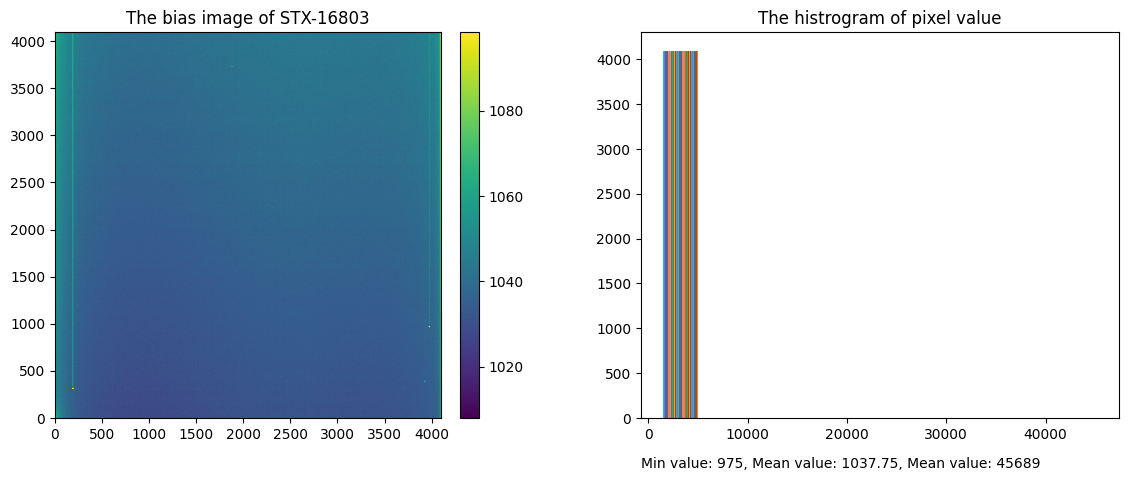

In [33]:
hdul = fits.open(bias_fits[12])

fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs[0], hdul[0].data)
im2 = axs[1].hist(hdul[0].data 
                    #histtype='step',
                    #50 
                    )

axs[0].set_title('The bias image of STX-16803')
axs[1].set_title('The histrogram of pixel value')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Mean value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)

### DARK

In [34]:
#dark_fits = summary[summary["IMAGETYP"] == "DARK"]["file"]
dark_fits = summary.loc[summary["IMAGETYP"] == "DARK"].copy()
dark_fits.reset_index(inplace=True)
dark_fits = dark_fits["file"]
print(type(dark_fits))
print(len(dark_fits))
print(dark_fits)
# Say dark frames have header OBJECT = "calib" && "IMAGE-TYP" = "DARK"
dark_comb = yfu.group_combine(
                dark_fits.tolist(),
                type_key = ["IMAGETYP"],
                type_val = ["DARK"],
                group_key = ["EXPTIME"],
                fmt = "master_dark_{:.0f}sec.fits",  # output file name format
                outdir = MASTERDIR,  # output directory (will automatically be made if not exist)
                combine = "med",
                memlimit = 2.e+10,
                verbose = True
            )

<class 'pandas.core.series.Series'>
20
0     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
1     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
2     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
3     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
4     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
5     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
6     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
7     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
8     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
9     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
10    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
11    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
12    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
13    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
14    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
15    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
16    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
17    /mn

/home/guitar79/Downloads/ysfitsutilpy/ysfitsutilpy/imutil/imcombine.py:159: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g_val, group in gs:


	/mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Light_-_2022-10-18_-_RiLA600_STX-16803_-_1bin/master_files_ys/master_dark_30sec.fits will be overridden.
.................................(dt = 20.591 s) 2023-02-01T22:33:45.147


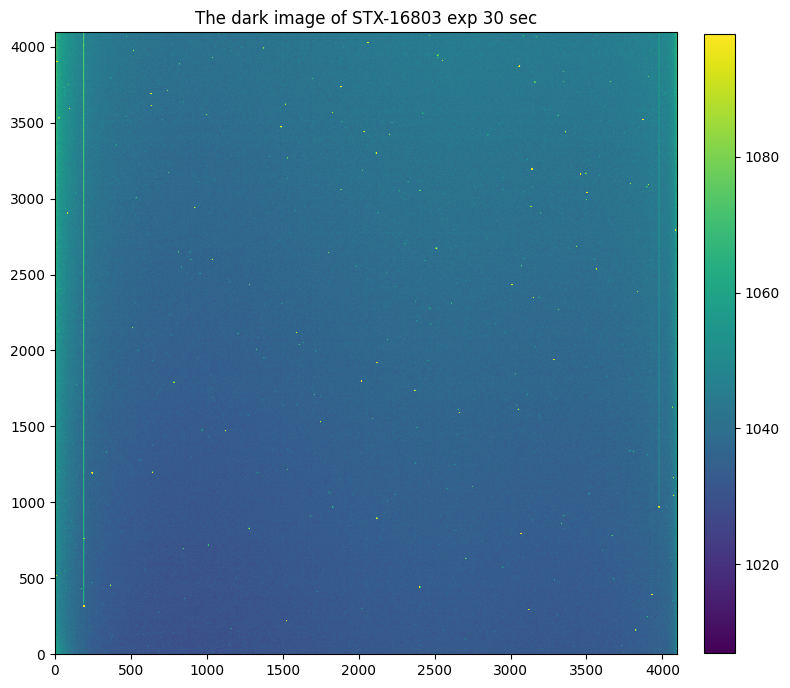

In [35]:
hdul = fits.open(dark_fits[2])

fig, axs = plt.subplots(1, 1, figsize=(8, 8), sharex=False, sharey=False, gridspec_kw=None)
im = _astro_utilities.zimshow(axs, hdul[0].data)
axs.set_title('The dark image of STX-16803 exp 30 sec')
plt.colorbar(im, fraction=0.0455, pad=0.04)
plt.tight_layout()


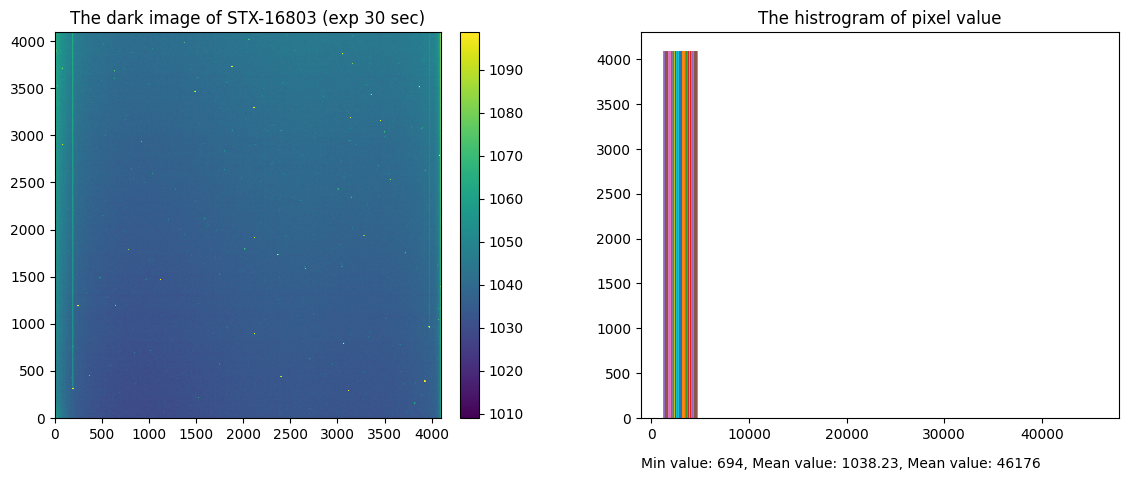

In [36]:
hdul = fits.open(dark_fits[5])

fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs[0], hdul[0].data)
im2 = axs[1].hist(hdul[0].data 
                    #histtype='step',
                    #50 
                    )

axs[0].set_title('The dark image of STX-16803 (exp 30 sec)')
axs[1].set_title('The histrogram of pixel value')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Mean value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)

## Flat

In [38]:
flat_fits = summary.loc[summary["IMAGETYP"] == "FLAT"].copy()
flat_fits.reset_index(inplace=True)
flat_fits = flat_fits["file"]
print(type(flat_fits))
print(len(flat_fits))
print(flat_fits)

<class 'pandas.core.series.Series'>
18
0     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
1     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
2     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
3     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
4     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
5     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
6     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
7     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
8     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
9     /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
10    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
11    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
12    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
13    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
14    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
15    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
16    /mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Lig...
17    /mn

In [43]:
# Say dark frames have header OBJECT = "calib" && "IMAGE-TYP" = "DARK"
flat_comb_norm = yfu.group_combine(
                flat_fits.tolist(),
                type_key = ["IMAGETYP"],
                type_val = ["FLAT"],
                group_key = ["FILTER"],
                fmt = "master_flat_{:s}_norm.fits",  # output file name format
                scale="med_sc", #norm
                scale_to_0th=False, #norm
                outdir = MASTERDIR,  # output directory (will automatically be made if not exist)
                combine = "med",
                memlimit = 2.e+10,
                verbose=True
                )
# Say dark frames have header OBJECT = "calib" && "IMAGE-TYP" = "DARK"
flat_comb_norm = yfu.group_combine(
                    flat_fits.tolist(),
                    type_key = ["IMAGETYP"],
                    type_val = ["FLAT"],
                    group_key = ["FILTER"],
                    fmt = "master_flat_{:s}.fits",  # output file name format
                    #scale="med_sc", #norm
                    #scale_to_0th=False, #norm
                    outdir = MASTERDIR,  # output directory (will automatically be made if not exist)
                    combine = "med",
                    memlimit = 2.e+10,
                    verbose=True
                )

Group and combine by ['FILTER'] (total 1 groups)
* V... (18 files)


/home/guitar79/Downloads/ysfitsutilpy/ysfitsutilpy/imutil/imcombine.py:159: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g_val, group in gs:


	/mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Light_-_2022-10-18_-_RiLA600_STX-16803_-_1bin/master_files_ys/master_flat_V_norm.fits will be overridden.
.................................(dt = 29.495 s) 2023-02-01T22:42:14.481
Group and combine by ['FILTER'] (total 1 groups)
* V... (18 files)


/home/guitar79/Downloads/ysfitsutilpy/ysfitsutilpy/imutil/imcombine.py:159: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for g_val, group in gs:


	/mnt/Rdata/CCD_obs/RiLA600_2022/BARNARD174_Light_-_2022-10-18_-_RiLA600_STX-16803_-_1bin/master_files_ys/master_flat_V.fits will be overridden.
.................................(dt = 15.962 s) 2023-02-01T22:42:30.444


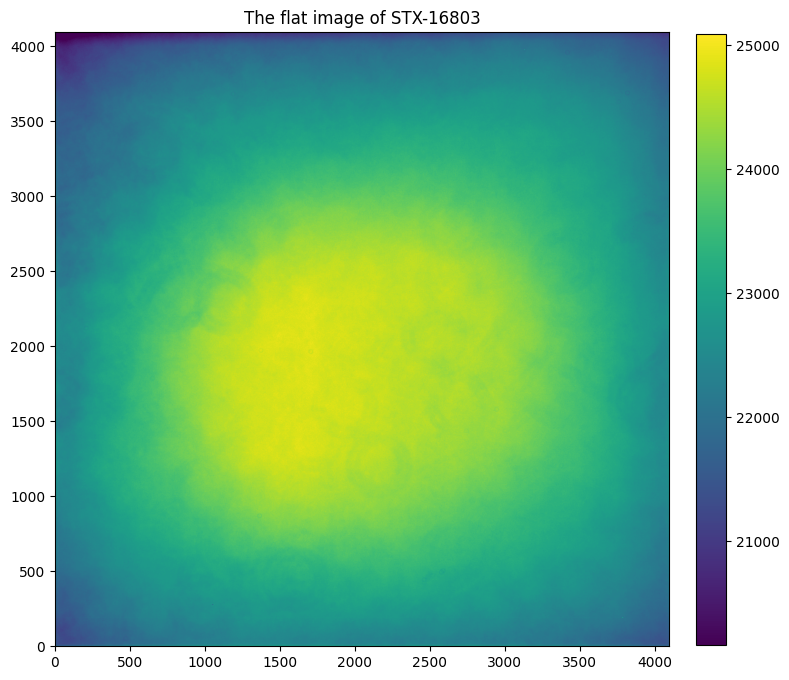

In [44]:
hdul = fits.open(flat_fits[3])

fig, axs = plt.subplots(1, 1, figsize=(8, 8), sharex=False, sharey=False, gridspec_kw=None)
im = _astro_utilities.zimshow(axs, hdul[0].data)
axs.set_title('The flat image of STX-16803')
plt.colorbar(im, fraction=0.0455, pad=0.04)
plt.tight_layout()

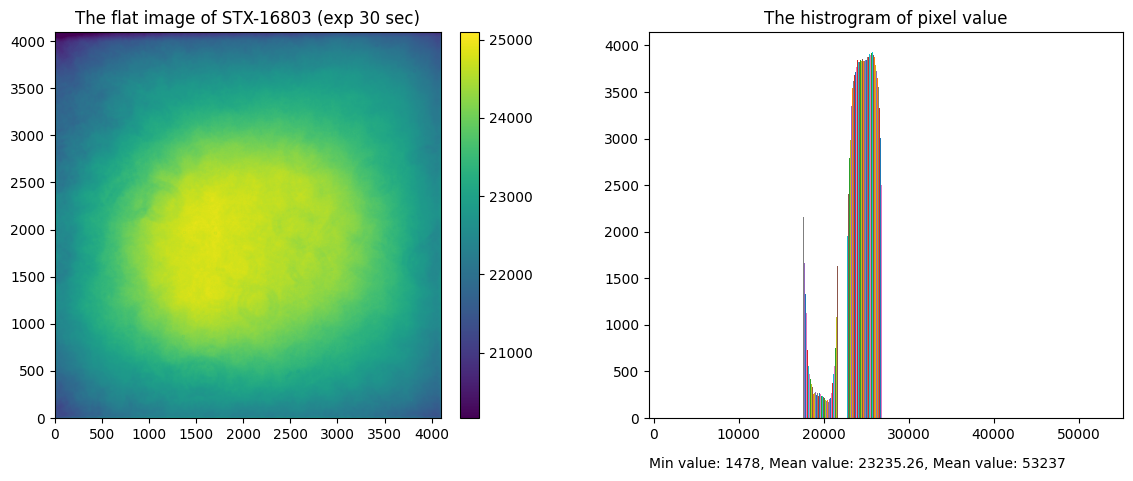

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs[0], hdul[0].data)
im2 = axs[1].hist(hdul[0].data 
                    #histtype='step',
                    #50 
                    )

axs[0].set_title('The flat image of STX-16803 (exp 30 sec)')
axs[1].set_title('The histrogram of pixel value')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Mean value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)

In [46]:
hdul = fits.open(flat_fits[10])

fig, axs = plt.subplots(1, 1, figsize=(8, 8), sharex=False, sharey=False, gridspec_kw=None)
im = _astro_utilities.zimshow(axs, hdul[0].data)
axs.set_title('The flat image of STX-16803 during cooling')
plt.colorbar(im, fraction=0.0455, pad=0.04)
plt.tight_layout()

## Flat image

skyflat image

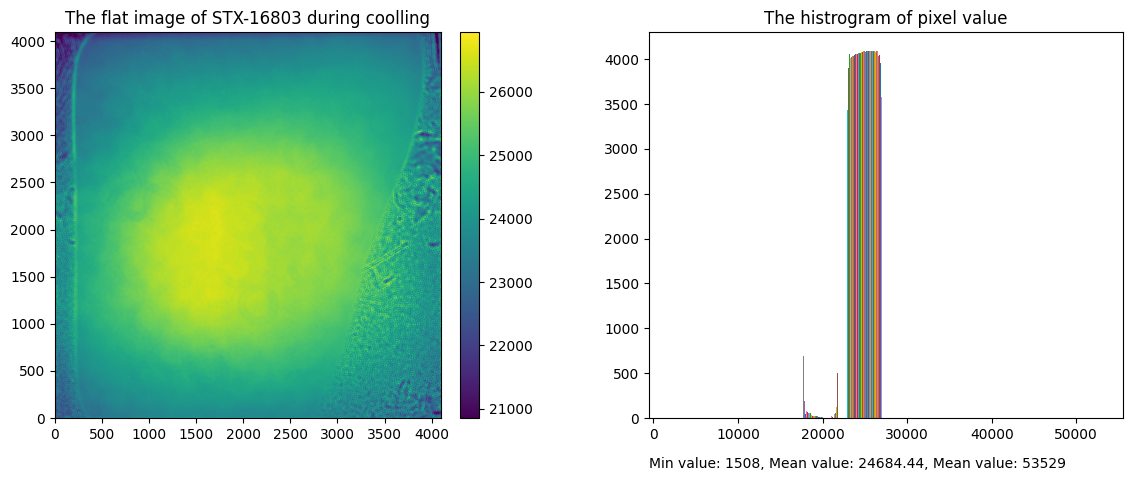

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs[0], hdul[0].data)
im2 = axs[1].hist(hdul[0].data 
                    #histtype='step',
                    #50 
                    )

axs[0].set_title('The flat image of STX-16803 during coolling')
axs[1].set_title('The histrogram of pixel value')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Mean value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)